# Importing necessary libraries

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing dataset

In [9]:
df = pd.read_csv('/Users/himanshukumarsingh/Downloads/internship/CodSoft/advertising.csv.xls')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Checking basic informations of the data

In [10]:
df.shape

(200, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
# checking for null values in the data
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### The dataset has no null values so there's no need of data cleaning(ie. the data is already cleaned)

## Data Visualization

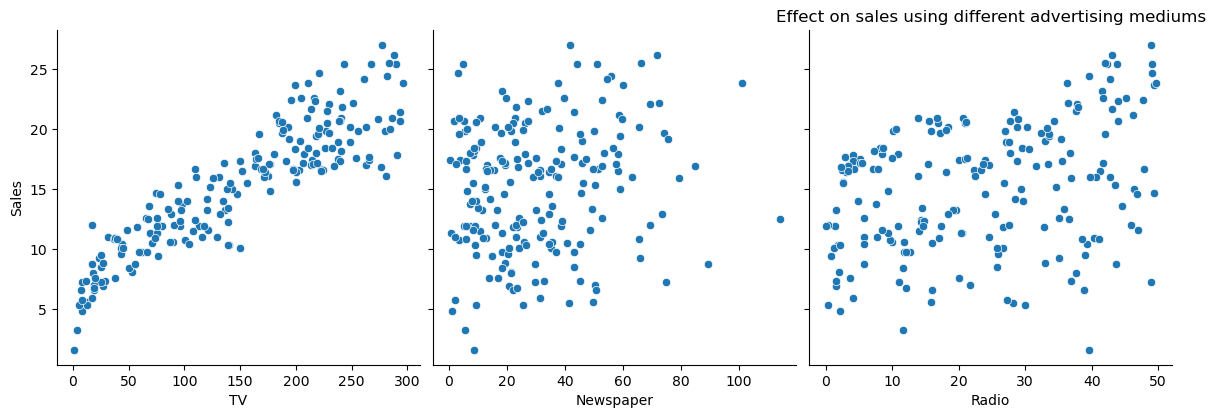

In [28]:
# checking the effect on sales through different advertising mediums
sns.pairplot(df, x_vars =['TV', 'Newspaper', 'Radio'], y_vars ='Sales', height=4, aspect=1, kind='scatter')
plt.title('Effect on sales using different advertising mediums')
plt.show()

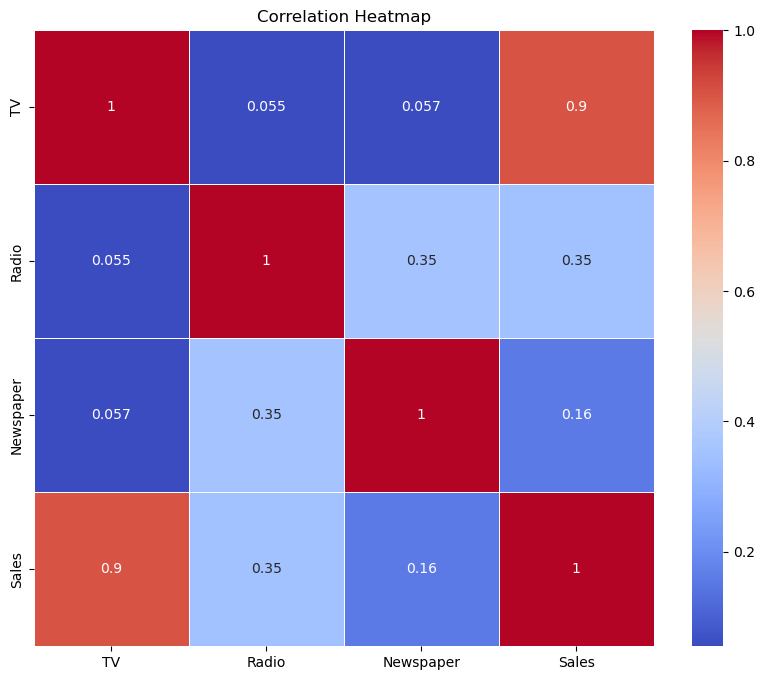

In [32]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### As we can see through the heatmap that the correlation between Sales and TV is highest so its clear that the advertisements made through TV are most effective gor the Sales.

# Feature Engineering

In [37]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index([], dtype='object')

### There is no categorical column in our data so there's no need of encoding

In [40]:
# Deciding input and output feature
X = df.drop('Sales', axis = 1)
y = df['Sales']

In [42]:
# splitting the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# normalising the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [47]:
# model fitting using support vector machine
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [48]:
# making predictions and checking accuracy of linear regresion
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

Train MSE: 4.107226622230511
Test MSE: 3.764590920990011
Train R2: 0.8490179285388404
Test R2: 0.8615170070816085


In [49]:
# model fittting using linear regression 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
# making predictions and checking accuracy of linear regresion
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

Train MSE: 2.8352482144126823
Test MSE: 2.40406744471189
Train R2: 0.8957759851376041
Test R2: 0.9115647723992757


## Using Support Vector Machine, we got a higher value of MSE(bot ytraining and testing) but Linear Regression is working pretty well on the given dataset, with comparatevely less MSE and high R2 score